In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('Fabricação de peças.csv', decimal = ',')
df_renomeado = df.set_axis(['Data', 'Pecas_fabricadas', 'Pecas_defeito', 'Horas_producao', 'Custo_peca', 'Custo_producao', 'Prod_fabrica1', 'Prod_fabrica2', 'Preco_venda'], axis=1)
df = df_renomeado
df

,Data,Pecas_fabricadas,Pecas_defeito,Horas_producao,Custo_peca,Custo_producao,Prod_fabrica1,Prod_fabrica2,Preco_venda
0,01/2020,NaN,31.0,114.0,11,20,0.52,0.48,55
1,02/2020,NaN,27.0,96.0,11,20,0.31,0.69,53
2,03/2020,NaN,43.0,105.0,10,20,0.43,0.57,52
3,04/2020,NaN,37.0,131.0,12,20,0.52,0.48,62
4,05/2020,NaN,17.0,95.0,13,20,0.50,0.50,64
5,06/2020,NaN,25.0,113.0,11,20,0.64,0.36,55
6,07/2020,NaN,40.0,115.0,12,20,0.56,0.44,59
7,08/2020,NaN,31.0,117.0,13,20,0.52,0.48,63
8,09/2020,NaN,33.0,127.0,10,20,0.38,0.62,51
9,10/2020,NaN,36.0,136.0,11,20,0.48,0.52,53


In [3]:
df.isna().sum()

Data                 0
Pecas_fabricadas    11
Pecas_defeito       12
Horas_producao      17
Custo_peca           0
Custo_producao       0
Prod_fabrica1        0
Prod_fabrica2        0
Preco_venda          0
dtype: int64

In [4]:
df1 = df
df_filtered = df.query('Pecas_fabricadas.notnull() and Pecas_defeito.notnull() and Horas_producao.notnull()')
df_filtered

,Data,Pecas_fabricadas,Pecas_defeito,Horas_producao,Custo_peca,Custo_producao,Prod_fabrica1,Prod_fabrica2,Preco_venda
11,12/2020,1229.0,17.0,144.0,11,20,0.73,0.27,57
12,01/2021,1341.0,26.0,156.0,12,20,0.50,0.50,60
13,02/2021,717.0,35.0,76.0,11,20,0.59,0.41,55
14,03/2021,955.0,23.0,104.0,12,20,0.32,0.68,62
15,04/2021,1123.0,58.0,114.0,11,20,0.69,0.31,53
16,05/2021,972.0,25.0,106.0,13,20,0.55,0.45,63
17,06/2021,985.0,38.0,104.0,11,20,0.36,0.64,53
18,07/2021,1128.0,6.0,128.0,13,20,0.58,0.42,63
31,08/2022,1243.0,35.0,127.0,10,20,0.58,0.42,52
32,09/2022,1013.0,34.0,103.0,10,20,0.20,0.80,50


In [5]:
df_filtered.isna().sum()

Data                0
Pecas_fabricadas    0
Pecas_defeito       0
Horas_producao      0
Custo_peca          0
Custo_producao      0
Prod_fabrica1       0
Prod_fabrica2       0
Preco_venda         0
dtype: int64

In [6]:
df_filtered.dtypes

Data                 object
Pecas_fabricadas    float64
Pecas_defeito       float64
Horas_producao      float64
Custo_peca            int64
Custo_producao        int64
Prod_fabrica1        object
Prod_fabrica2        object
Preco_venda           int64
dtype: object

In [7]:
# df_filtered.loc[:, 'Data'] = pd.to_datetime(df_filtered['Data'], format='%m/%Y')
# df_filtered.loc[:, 'Ano'] = df_filtered['Data'].dt.year
# df_filtered.loc[:, 'Mes'] = df_filtered['Data'].dt.month
# df_filtered.loc[:, 'Dia'] = df_filtered['Data'].dt.day
df_filtered = df_filtered.drop('Data', axis=1)

In [8]:
df_filtered

,Pecas_fabricadas,Pecas_defeito,Horas_producao,Custo_peca,Custo_producao,Prod_fabrica1,Prod_fabrica2,Preco_venda
11,1229.0,17.0,144.0,11,20,0.73,0.27,57
12,1341.0,26.0,156.0,12,20,0.50,0.50,60
13,717.0,35.0,76.0,11,20,0.59,0.41,55
14,955.0,23.0,104.0,12,20,0.32,0.68,62
15,1123.0,58.0,114.0,11,20,0.69,0.31,53
16,972.0,25.0,106.0,13,20,0.55,0.45,63
17,985.0,38.0,104.0,11,20,0.36,0.64,53
18,1128.0,6.0,128.0,13,20,0.58,0.42,63
31,1243.0,35.0,127.0,10,20,0.58,0.42,52
32,1013.0,34.0,103.0,10,20,0.20,0.80,50


In [9]:
correlacao = df_filtered.corr()

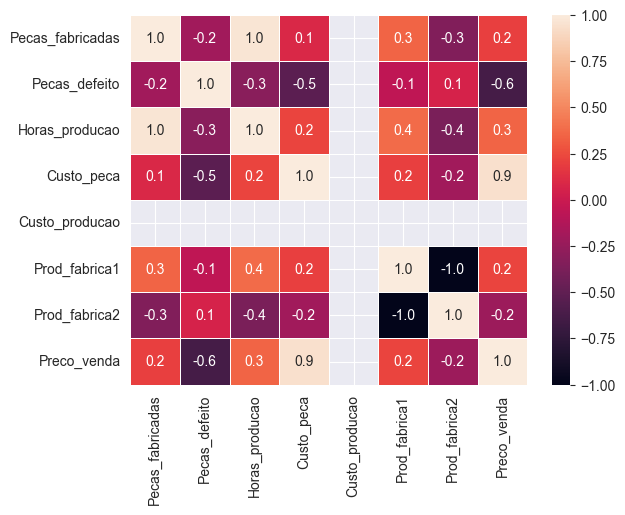

In [10]:
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)

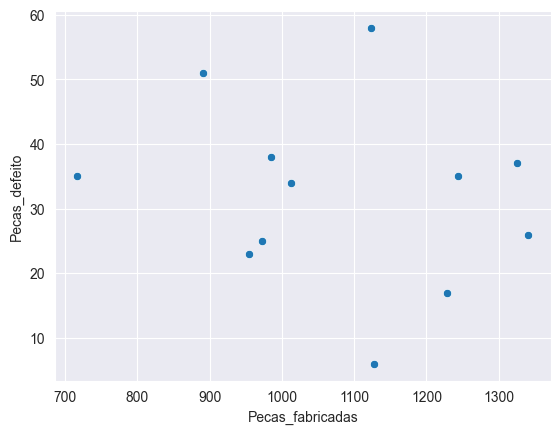

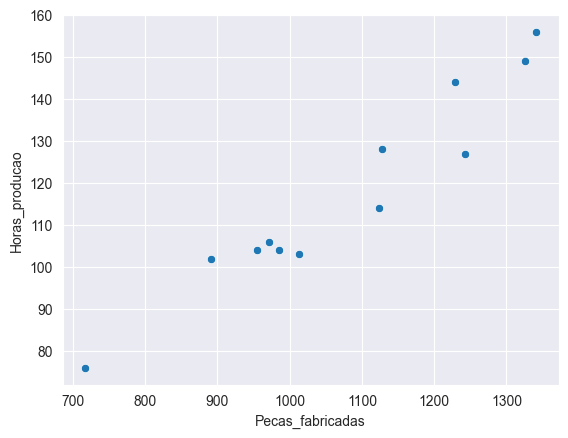

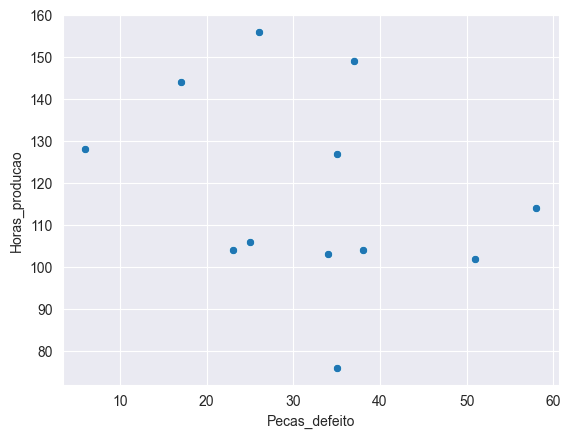

In [11]:
sns.scatterplot(data=df_filtered, x='Pecas_fabricadas', y='Pecas_defeito')
plt.show()

sns.scatterplot(data=df_filtered, x='Pecas_fabricadas', y='Horas_producao')
plt.show()

sns.scatterplot(data=df_filtered, x='Pecas_defeito', y='Horas_producao')
plt.show()

Regressão Polinomial:  0.9361513675655755
Regressão Linear:  0.9289453130339131


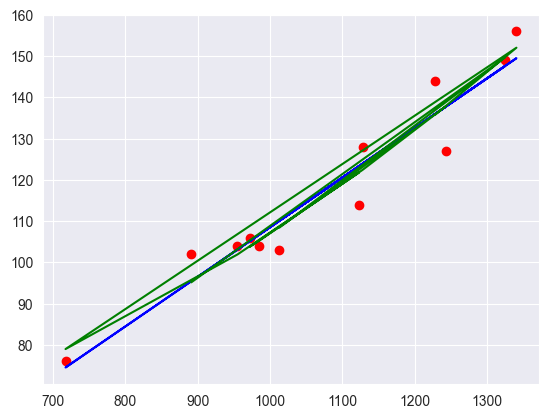

In [12]:
df_filtered = df_filtered.loc[df_filtered['Pecas_fabricadas'] != 0]
df_filtered = df_filtered.loc[df_filtered['Pecas_defeito'] != 0]

X = df_filtered[['Pecas_fabricadas']].to_numpy()
Y = df_filtered['Horas_producao'].to_numpy()

poly_f = PolynomialFeatures(degree=2)

X_poly = poly_f.fit_transform(X)

model = LinearRegression()
model1 = LinearRegression()

model.fit(X_poly, Y) # Regressão Polinomial
model1.fit(X, Y) # Regressão Linear

print("Regressão Polinomial: ", model.score(X_poly, Y))
print("Regressão Linear: ", model1.score(X, Y))

plt.scatter(X, Y, color='red') 

plt.plot(X, model1.predict(X), color='blue') # Regressão Linear
plt.plot(X, model.predict(X_poly), color='green') # Regressão Polinomial

plt.show()

In [13]:
df_filtered.columns

Index(['Pecas_fabricadas', 'Pecas_defeito', 'Horas_producao', 'Custo_peca',
       'Custo_producao', 'Prod_fabrica1', 'Prod_fabrica2', 'Preco_venda'],
      dtype='object')

In [14]:
x = df_filtered[['Pecas_defeito','Pecas_fabricadas', 'Custo_peca', 'Preco_venda']]
y = df_filtered[ 'Horas_producao'].to_numpy()
model = LinearRegression()
model.fit(x, y)
score = model.score(x, y)
print(score)

0.9555261196252476


In [15]:

df_filtered = df1[(df1['Pecas_defeito'].notnull()) & (df1['Horas_producao'].notnull()) & (df1['Pecas_fabricadas'].notnull()) & (df1['Custo_peca'].notnull()) & (df1['Preco_venda'].notnull())]


x = df_filtered[['Pecas_defeito', 'Horas_producao', 'Custo_peca', 'Preco_venda']].to_numpy()
y = df_filtered['Pecas_fabricadas'].to_numpy()
model_fabricadas = LinearRegression()
model_fabricadas.fit(x, y)
score = model_fabricadas.score(x, y)
print(score)


def completar_fabricadas(linha):
  if pd.isna(linha['Pecas_fabricadas']) and not pd.isna(linha['Pecas_defeito']) and not pd.isna(linha['Horas_producao']) and not pd.isna(linha['Custo_peca']) and not pd.isna(linha['Preco_venda']):
    campos = linha[['Pecas_defeito', 'Horas_producao', 'Custo_peca', 'Preco_venda']]
    return round(model_fabricadas.predict([campos])[0])
  return linha['Pecas_fabricadas']


df1['fabricadas_calculado'] = df1.apply(completar_fabricadas, axis=1)
df1

0.9507581582964775


,Data,Pecas_fabricadas,Pecas_defeito,Horas_producao,Custo_peca,Custo_producao,Prod_fabrica1,Prod_fabrica2,Preco_venda,fabricadas_calculado
0,01/2020,NaN,31.0,114.0,11,20,0.52,0.48,55,1056.0
1,02/2020,NaN,27.0,96.0,11,20,0.31,0.69,53,917.0
2,03/2020,NaN,43.0,105.0,10,20,0.43,0.57,52,1004.0
3,04/2020,NaN,37.0,131.0,12,20,0.52,0.48,62,1161.0
4,05/2020,NaN,17.0,95.0,13,20,0.50,0.50,64,845.0
5,06/2020,NaN,25.0,113.0,11,20,0.64,0.36,55,1044.0
6,07/2020,NaN,40.0,115.0,12,20,0.56,0.44,59,1048.0
7,08/2020,NaN,31.0,117.0,13,20,0.52,0.48,63,1038.0
8,09/2020,NaN,33.0,127.0,10,20,0.38,0.62,51,1184.0
9,10/2020,NaN,36.0,136.0,11,20,0.48,0.52,53,1249.0


In [16]:

df_filtered = df1[(df1['Pecas_defeito'].notnull()) & (df1['Horas_producao'].notnull()) & (df1['fabricadas_calculado'].notnull()) & (df1['Custo_peca'].notnull()) & (df1['Preco_venda'].notnull())]


x = df_filtered[['Horas_producao', 'fabricadas_calculado', 'Custo_peca', 'Preco_venda']].to_numpy()
y = df_filtered['Pecas_defeito'].to_numpy()
model_defeito = LinearRegression()
model_defeito.fit(x, y)
score = model_defeito.score(x, y)
print(score)


def completar_defeito(linha):
  if pd.isna(linha['Pecas_defeito']) and not pd.isna(linha['Horas_producao']) and not pd.isna(linha['fabricadas_calculado']) and not pd.isna(linha['Custo_peca']) and not pd.isna(linha['Preco_venda']):
    campos = linha[['Horas_producao', 'fabricadas_calculado', 'Custo_peca', 'Preco_venda']]
    return round(model_defeito.predict([campos])[0])
  return linha['Pecas_defeito']


df1['defeito_calculado'] = df1.apply(completar_defeito, axis=1)
df1

0.28462291434007525


,Data,Pecas_fabricadas,Pecas_defeito,Horas_producao,Custo_peca,Custo_producao,Prod_fabrica1,Prod_fabrica2,Preco_venda,fabricadas_calculado,defeito_calculado
0,01/2020,NaN,31.0,114.0,11,20,0.52,0.48,55,1056.0,31.0
1,02/2020,NaN,27.0,96.0,11,20,0.31,0.69,53,917.0,27.0
2,03/2020,NaN,43.0,105.0,10,20,0.43,0.57,52,1004.0,43.0
3,04/2020,NaN,37.0,131.0,12,20,0.52,0.48,62,1161.0,37.0
4,05/2020,NaN,17.0,95.0,13,20,0.50,0.50,64,845.0,17.0
5,06/2020,NaN,25.0,113.0,11,20,0.64,0.36,55,1044.0,25.0
6,07/2020,NaN,40.0,115.0,12,20,0.56,0.44,59,1048.0,40.0
7,08/2020,NaN,31.0,117.0,13,20,0.52,0.48,63,1038.0,31.0
8,09/2020,NaN,33.0,127.0,10,20,0.38,0.62,51,1184.0,33.0
9,10/2020,NaN,36.0,136.0,11,20,0.48,0.52,53,1249.0,36.0


In [17]:

df_filtered = df1[(df1['Pecas_defeito'].notnull()) & (df1['fabricadas_calculado'].notnull()) & (df1['Custo_peca'].notnull()) & (df1['Preco_venda'].notnull()) & (df1['Horas_producao'].notnull())]


x = df_filtered[['Pecas_defeito', 'fabricadas_calculado', 'Custo_peca', 'Preco_venda']].to_numpy()
y = df_filtered['Horas_producao'].to_numpy()
model_horas = LinearRegression()
model_horas.fit(x, y)
score = model_horas.score(x, y)
print(score)

def completar_horas(linha):
  if pd.isna(linha['Horas_producao']) and not pd.isna(linha['Pecas_defeito']) and not pd.isna(linha['fabricadas_calculado']) and not pd.isna(linha['Custo_peca']) and not pd.isna(linha['Preco_venda']):
    campos = linha[['Pecas_defeito', 'fabricadas_calculado', 'Custo_peca', 'Preco_venda']]
    return round(model_horas.predict([campos])[0])
  return linha['Horas_producao']


df1['Horas_producao_calculado'] = df1.apply(completar_horas, axis=1)
df1

0.9658212598930138


,Data,Pecas_fabricadas,Pecas_defeito,Horas_producao,Custo_peca,Custo_producao,Prod_fabrica1,Prod_fabrica2,Preco_venda,fabricadas_calculado,defeito_calculado,Horas_producao_calculado
0,01/2020,NaN,31.0,114.0,11,20,0.52,0.48,55,1056.0,31.0,114.0
1,02/2020,NaN,27.0,96.0,11,20,0.31,0.69,53,917.0,27.0,96.0
2,03/2020,NaN,43.0,105.0,10,20,0.43,0.57,52,1004.0,43.0,105.0
3,04/2020,NaN,37.0,131.0,12,20,0.52,0.48,62,1161.0,37.0,131.0
4,05/2020,NaN,17.0,95.0,13,20,0.50,0.50,64,845.0,17.0,95.0
5,06/2020,NaN,25.0,113.0,11,20,0.64,0.36,55,1044.0,25.0,113.0
6,07/2020,NaN,40.0,115.0,12,20,0.56,0.44,59,1048.0,40.0,115.0
7,08/2020,NaN,31.0,117.0,13,20,0.52,0.48,63,1038.0,31.0,117.0
8,09/2020,NaN,33.0,127.0,10,20,0.38,0.62,51,1184.0,33.0,127.0
9,10/2020,NaN,36.0,136.0,11,20,0.48,0.52,53,1249.0,36.0,136.0


In [18]:
x = df1[['defeito_calculado','fabricadas_calculado', 'Custo_peca', 'Preco_venda']]
y = df1['Horas_producao_calculado'].to_numpy()
model = LinearRegression()
model.fit(x, y)
score = model.score(x, y)
print(score)

0.966779530056773
